## Daily Challenge: Interactive Data Visualization with Plotly and Plotnine

### 1. Data Preparation

In [1]:
# !mkdir datasets
# !kaggle datasets download juhi1994/superstore -p datasets/
# !kaggle datasets download justinrwong/us-states-to-abbreviations -p datasets

In [2]:
import zipfile
import os

ds_dir = 'datasets/'

for file in os.listdir(ds_dir):
    if file.endswith('.zip'):
        with zipfile.ZipFile(f'{ds_dir}{file}', 'r') as f:
            f.extractall(ds_dir)

os.listdir(ds_dir)

['States - Sheet1.csv',
 'superstore.zip',
 'US Superstore data.xls',
 'us-states-to-abbreviations.zip']

In [3]:
import pandas as pd

def load_df(ds_path, **kwargs):
    if ds_path.endswith('.csv'):
        return pd.read_csv(ds_path, **kwargs)
    elif ds_path.endswith(('.xlsx', '.xls')):
        return pd.read_excel(ds_path, **kwargs)
    else:
        raise ValueError(f"Unsupported file type: {ds_path}")



In [4]:
# !pip install xlrd

In [5]:
import pandas as pd

pd.set_option('display.max_columns', None)

df = load_df(ds_dir + 'US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,NaN,4,793,793,3,1,531,49,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,5968,37,37,5191,9994,915,2001,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [10]:
# It looks like the data we analyzed in mini project.
# So we know that the data is pretty clean and ready for futher analysis.


In [11]:
# 2. Data Visualization with Plotly:
# Create an interactive line chart to show sales trends over the years.
# Build an interactive map to visualize sales distribution by country.


### 2. Data Visualization with Plotly

In [12]:
import plotly.graph_objects as go
from ipywidgets import widgets
from IPython.display import display
import numpy as np


fig = go.FigureWidget(go.Figure())

# I used code from examples with widgets on plotly website 
# and refactored it to fit my data and needs
date_interval = widgets.Dropdown(
    description='Date Interval:',
    value='M',
    options=[('Day', 'D'), ('Week', 'W'), ('Month', 'M'), ('Quarter', 'Q'), ('Year', 'Y')]
)

def update_plot(change):
    interval = date_interval.value
    sales_trends = df.groupby(df['Order Date'].dt.to_period(interval))['Sales'].sum().reset_index()
    sales_trends['Order Date'] = sales_trends['Order Date'].dt.to_timestamp()

    fig.data = []

    fig.add_trace(go.Scatter(x=sales_trends['Order Date'], y=sales_trends['Sales'], name='Sales'))
    
    
    # Only way I managed to transform datetime to numeric so polyfit could work
    #  Is there a better way?
    dt_numeric = (sales_trends['Order Date'] - sales_trends['Order Date'].min()).dt.total_seconds()
    z = np.polyfit(dt_numeric, sales_trends['Sales'], 1)
    p = np.poly1d(z)
    fig.add_trace(go.Scatter(x=sales_trends['Order Date'], y=p(dt_numeric),
                             mode='lines', name='Trend', line=dict(color='red', dash='dash')))
    
    fig.update_layout(
        title=f'Sales Trends ({interval})',
        xaxis_title='Date',
        yaxis_title='Total Sales',
        width=800, height=500
    )


date_interval.observe(update_plot, names='value')

# display(date_interval, fig)
display(widgets.VBox([date_interval, fig]))

update_plot(None)

In [13]:
# If we choose to look as sales by day, it's hard to see the trend. The variance is too high.
# However, the bigger interval we choose - the better we can see the upward trend over time.

In [14]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [15]:
# In plotly there are several built-in ways to display geo data using choropleth map.
# There is ony one country in dataset (i.e. USA), so I will map sales by state.
# I found a dataset with US states and their abbreviations.
states_df = load_df(ds_dir + 'States - Sheet1.csv')
states_df.head()



,State,Standard,Postal
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [16]:
df_tmp = df.merge(states_df, on='State')
df_tmp[df_tmp['Postal'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Standard,Postal


In [17]:
df = df_tmp

In [18]:
import plotly.express as px

country_sales = df.groupby(['State', 'Postal'])['Sales'].sum().reset_index()

fig_map = px.choropleth(
    country_sales,
    locations='Postal', 
    locationmode='USA-states', # Here we specify desired location mode
    color='Sales',
    hover_name='State',
    color_continuous_scale='Viridis',
    title='Sales Distribution by State'
)

fig_map.update_layout(
    geo=dict(
        scope='usa',
        showframe=False,
        showcoastlines=True,
        projection_type='albers usa'
    ),
    width=900,
    height=600
)

fig_map.show()



In [19]:
# We can see that California and New York has highest sales and outperform other states with solid margin.
# However, there is no clear pattern on why some states are performing better than others.
# We could find information on population and other metrics to see if there is a correlation.


In [20]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Standard,Postal
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Ky.,KY
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Ky.,KY
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Calif.,CA
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Fla.,FL
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Fla.,FL


### 3. Data Visualization with Plotnine

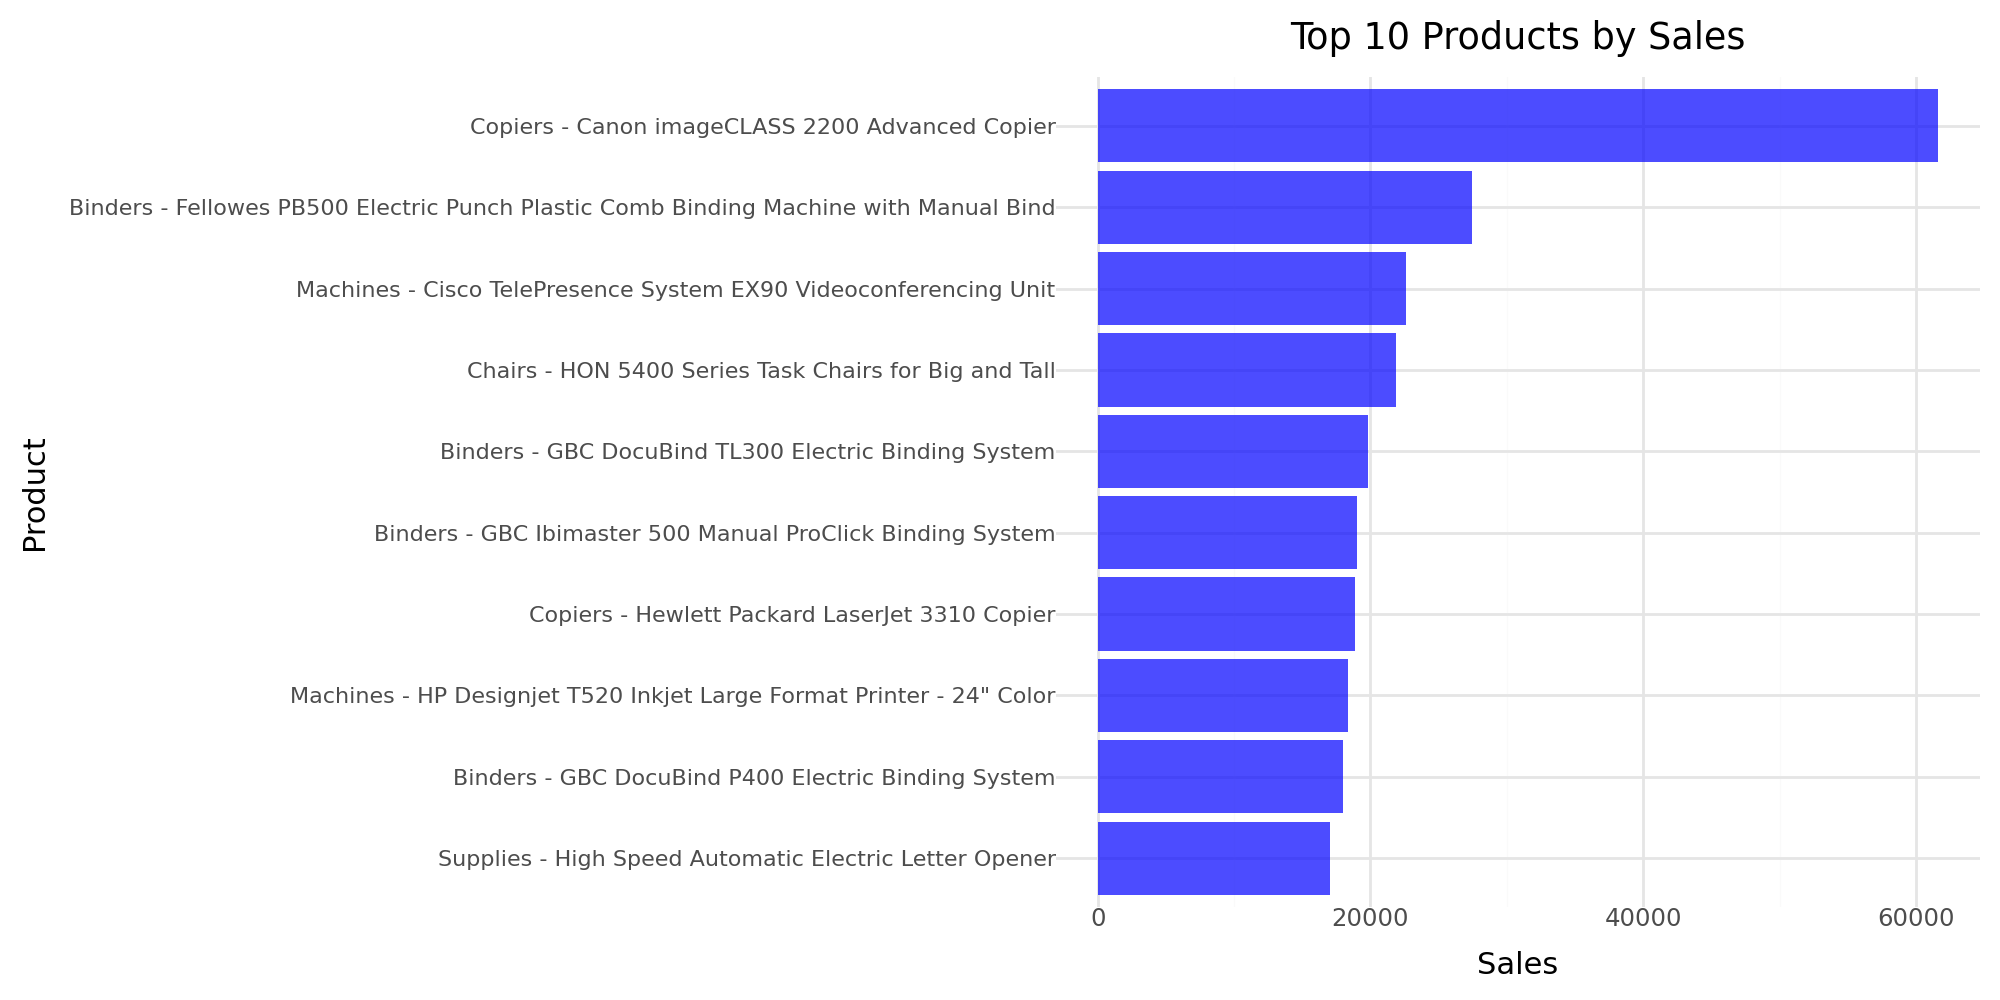

In [21]:
# 3. Data Visualization with Plotnine:
# Use Plotnine to generate a bar chart showing top 10 products by sales.
# Create a scatter plot to analyze the relationship between profit and discount.

import plotnine as p9

top_products = df.groupby(['Product ID', 'Product Name', 'Sub-Category'])['Sales'].sum().reset_index() \
    .sort_values('Sales', ascending=True).tail(10)

# Let's add Sub-Category to the labels so we could batter grasp what product is
top_products['Label'] = top_products['Sub-Category']  + ' - ' +  top_products['Product Name']

# I didn't find a better way to set the order for the graph
top_products['Label'] = pd.Categorical(top_products['Label'], 
                                        categories=top_products['Label'].tolist(),
                                        ordered=True)

plot = (p9.ggplot(top_products, p9.aes(x='Label', y='Sales')) # Initiate data
 + p9.geom_bar(stat='identity', fill='blue', alpha=0.7) # Bar chart
 + p9.coord_flip() # Make bars horizontal
 + p9.labs(title='Top 10 Products by Sales', x='Product', y='Sales') # Annotation
 + p9.theme_minimal() # Makes it a bit nicer
 + p9.theme(axis_text_y=p9.element_text(size=8), # Adjust text size for readability
            figure_size=(10, 5)) # Increase figure size to make y-axis wider
)

plot.show()

In [22]:
df['Segment'].unique()


array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

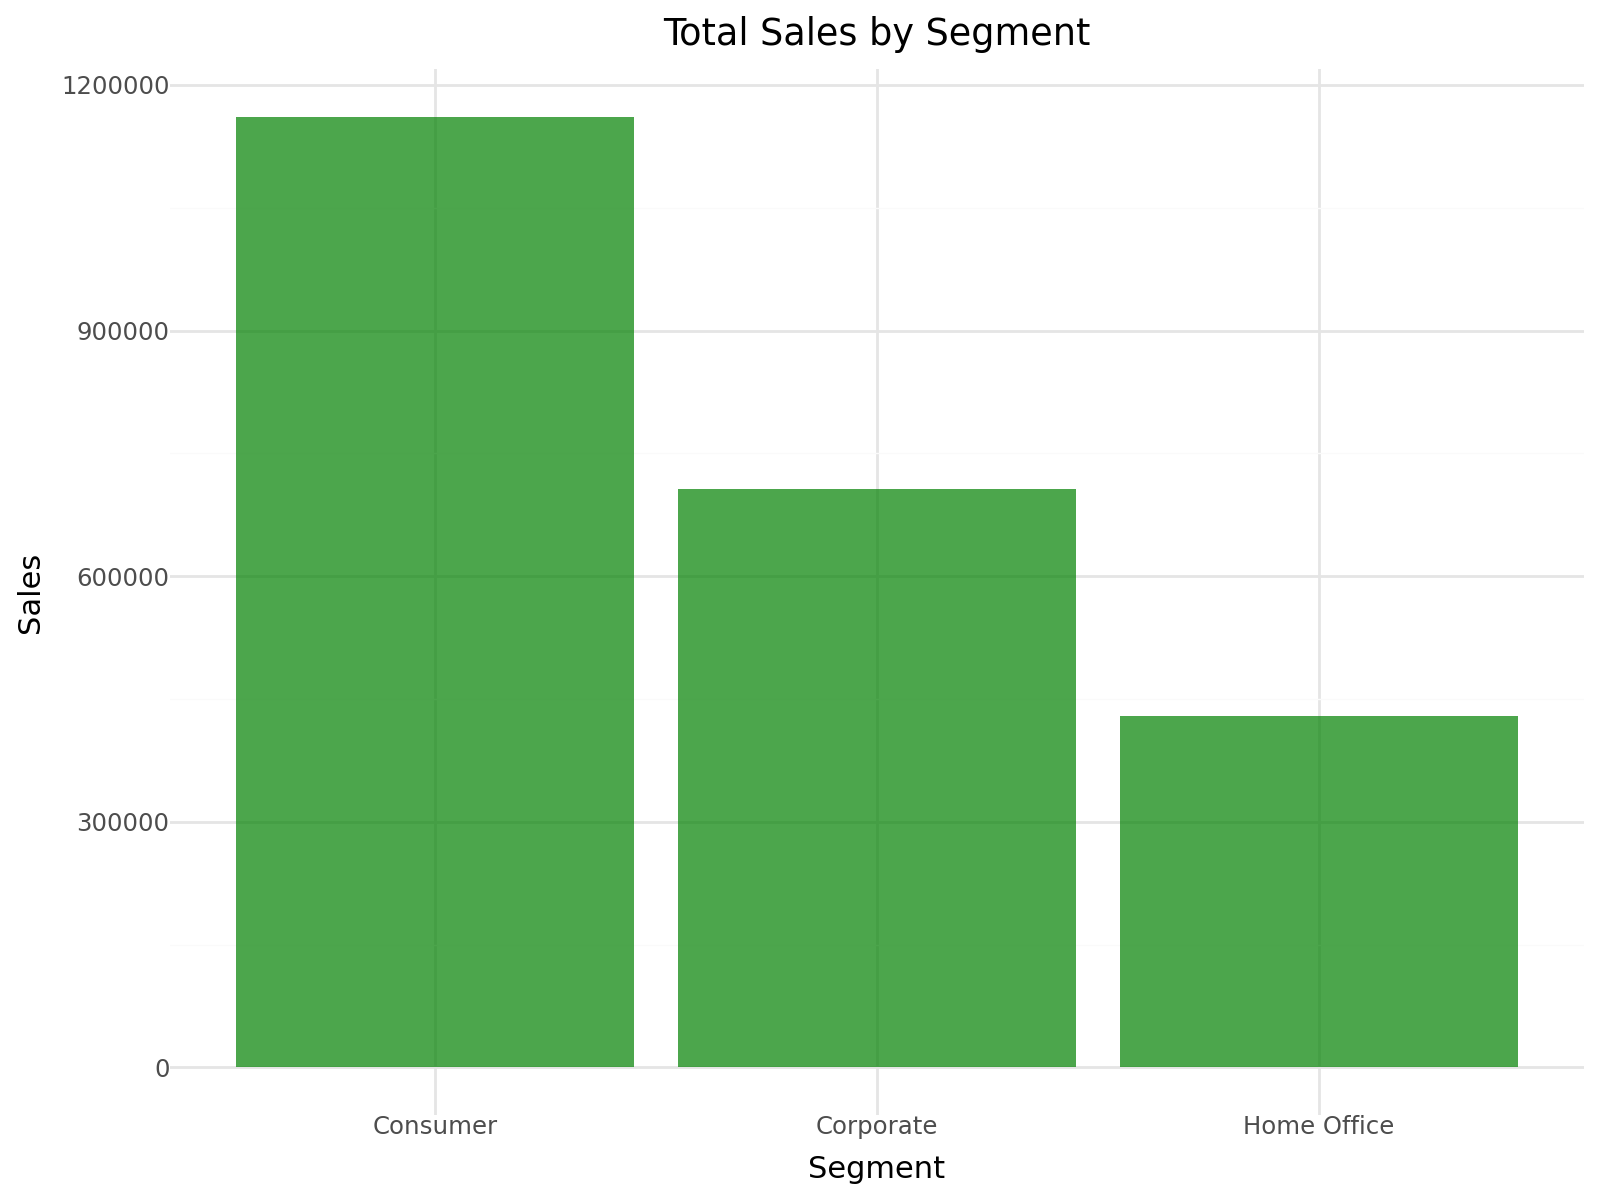

In [23]:
# Let's take a look at the distribution of sales by segment
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()

plot = (p9.ggplot(segment_sales, p9.aes(x='Segment', y='Sales'))
 + p9.geom_bar(stat='identity', fill='green', alpha=0.7)
 + p9.labs(title='Total Sales by Segment', x='Segment', y='Sales')
 + p9.theme_minimal()
 + p9.theme(figure_size=(8, 6))
)

plot.show()


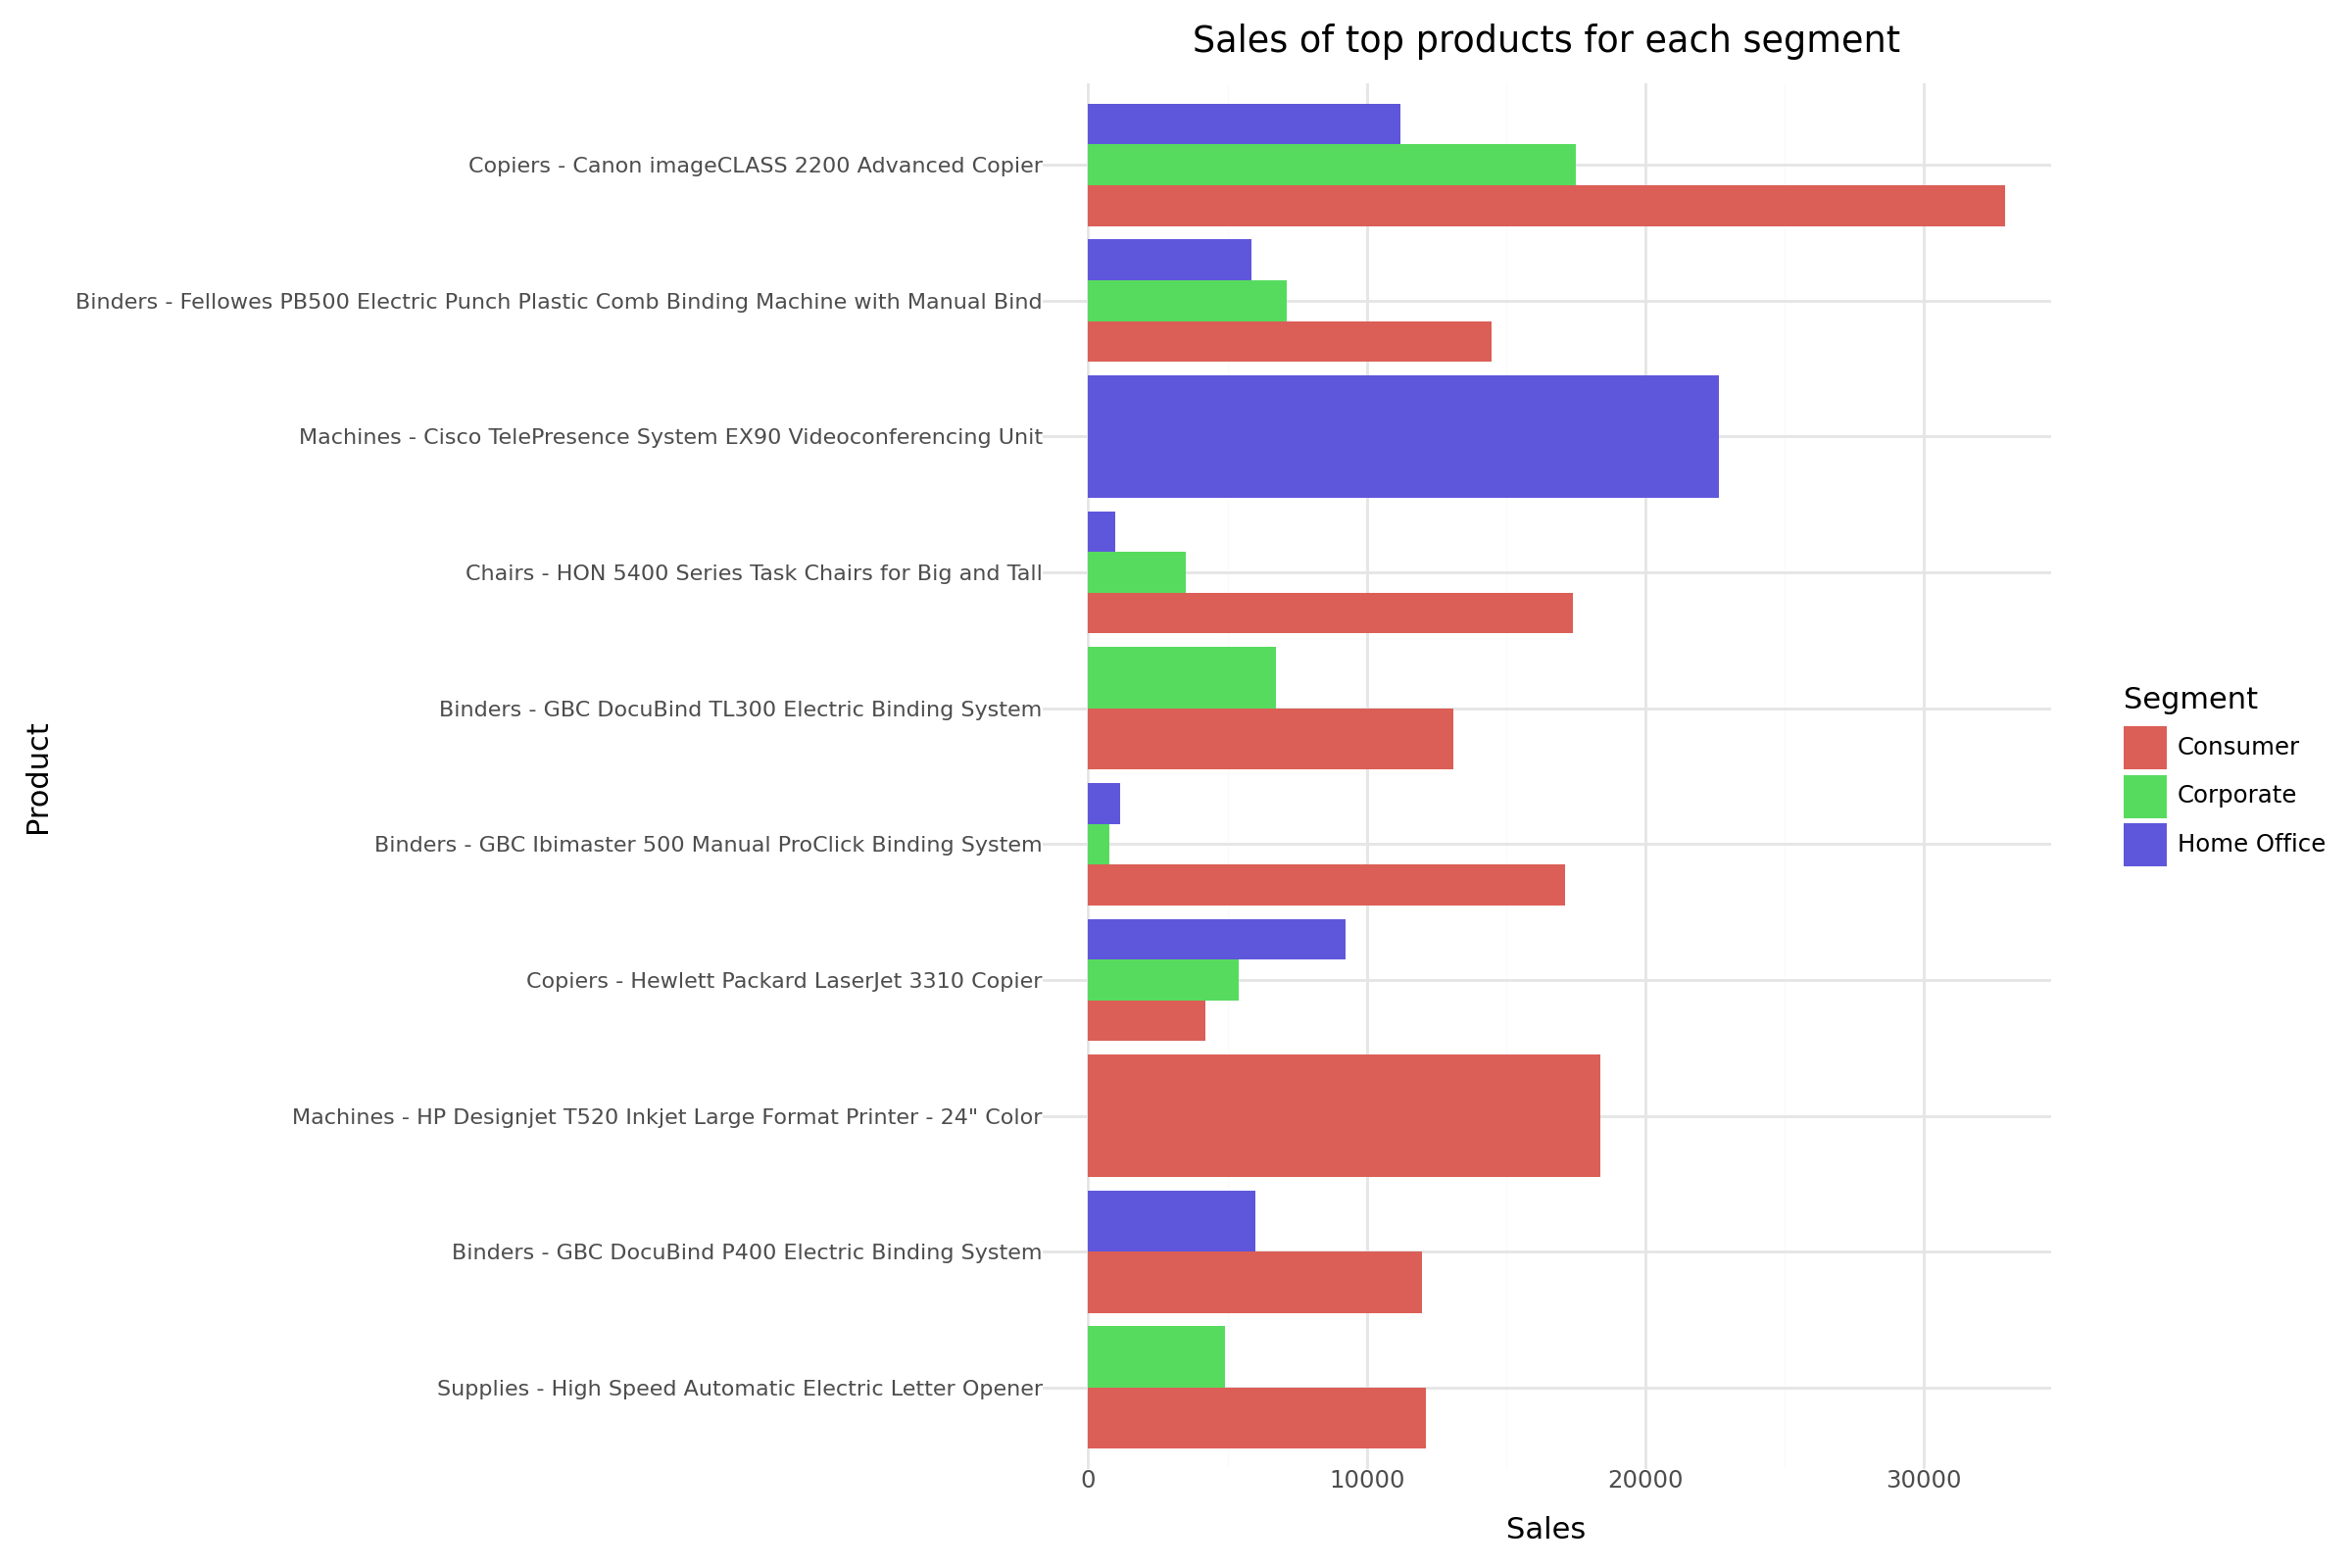

In [24]:
top_products_segment = df.groupby(['Product ID', 'Product Name', 'Sub-Category', 'Segment'])['Sales'].sum().reset_index()

top_products_segment = top_products_segment[top_products_segment['Product ID'].isin(top_products['Product ID'])]

# top_products_segment = top_products_segment.unstack().fillna(0).stack().reset_index().rename(columns={0: 'Sales'})

top_products_segment['Label'] = top_products_segment['Sub-Category']  + ' - ' +  top_products_segment['Product Name']
top_products_segment['Label'] = pd.Categorical(top_products_segment['Label'], 
                                        categories=top_products['Label'].tolist(),
                                        ordered=True)

plot = (p9.ggplot(top_products_segment, p9.aes(x='Label', y='Sales', fill='Segment'))
 + p9.geom_bar(stat='identity', position='dodge')
 + p9.coord_flip()
 + p9.labs(title='Sales of top products for each segment', 
           x='Product', 
           y='Sales')
 + p9.theme_minimal()
 + p9.theme(figure_size=(12, 8),
            axis_text_y=p9.element_text(size=8))
)

plot.show()

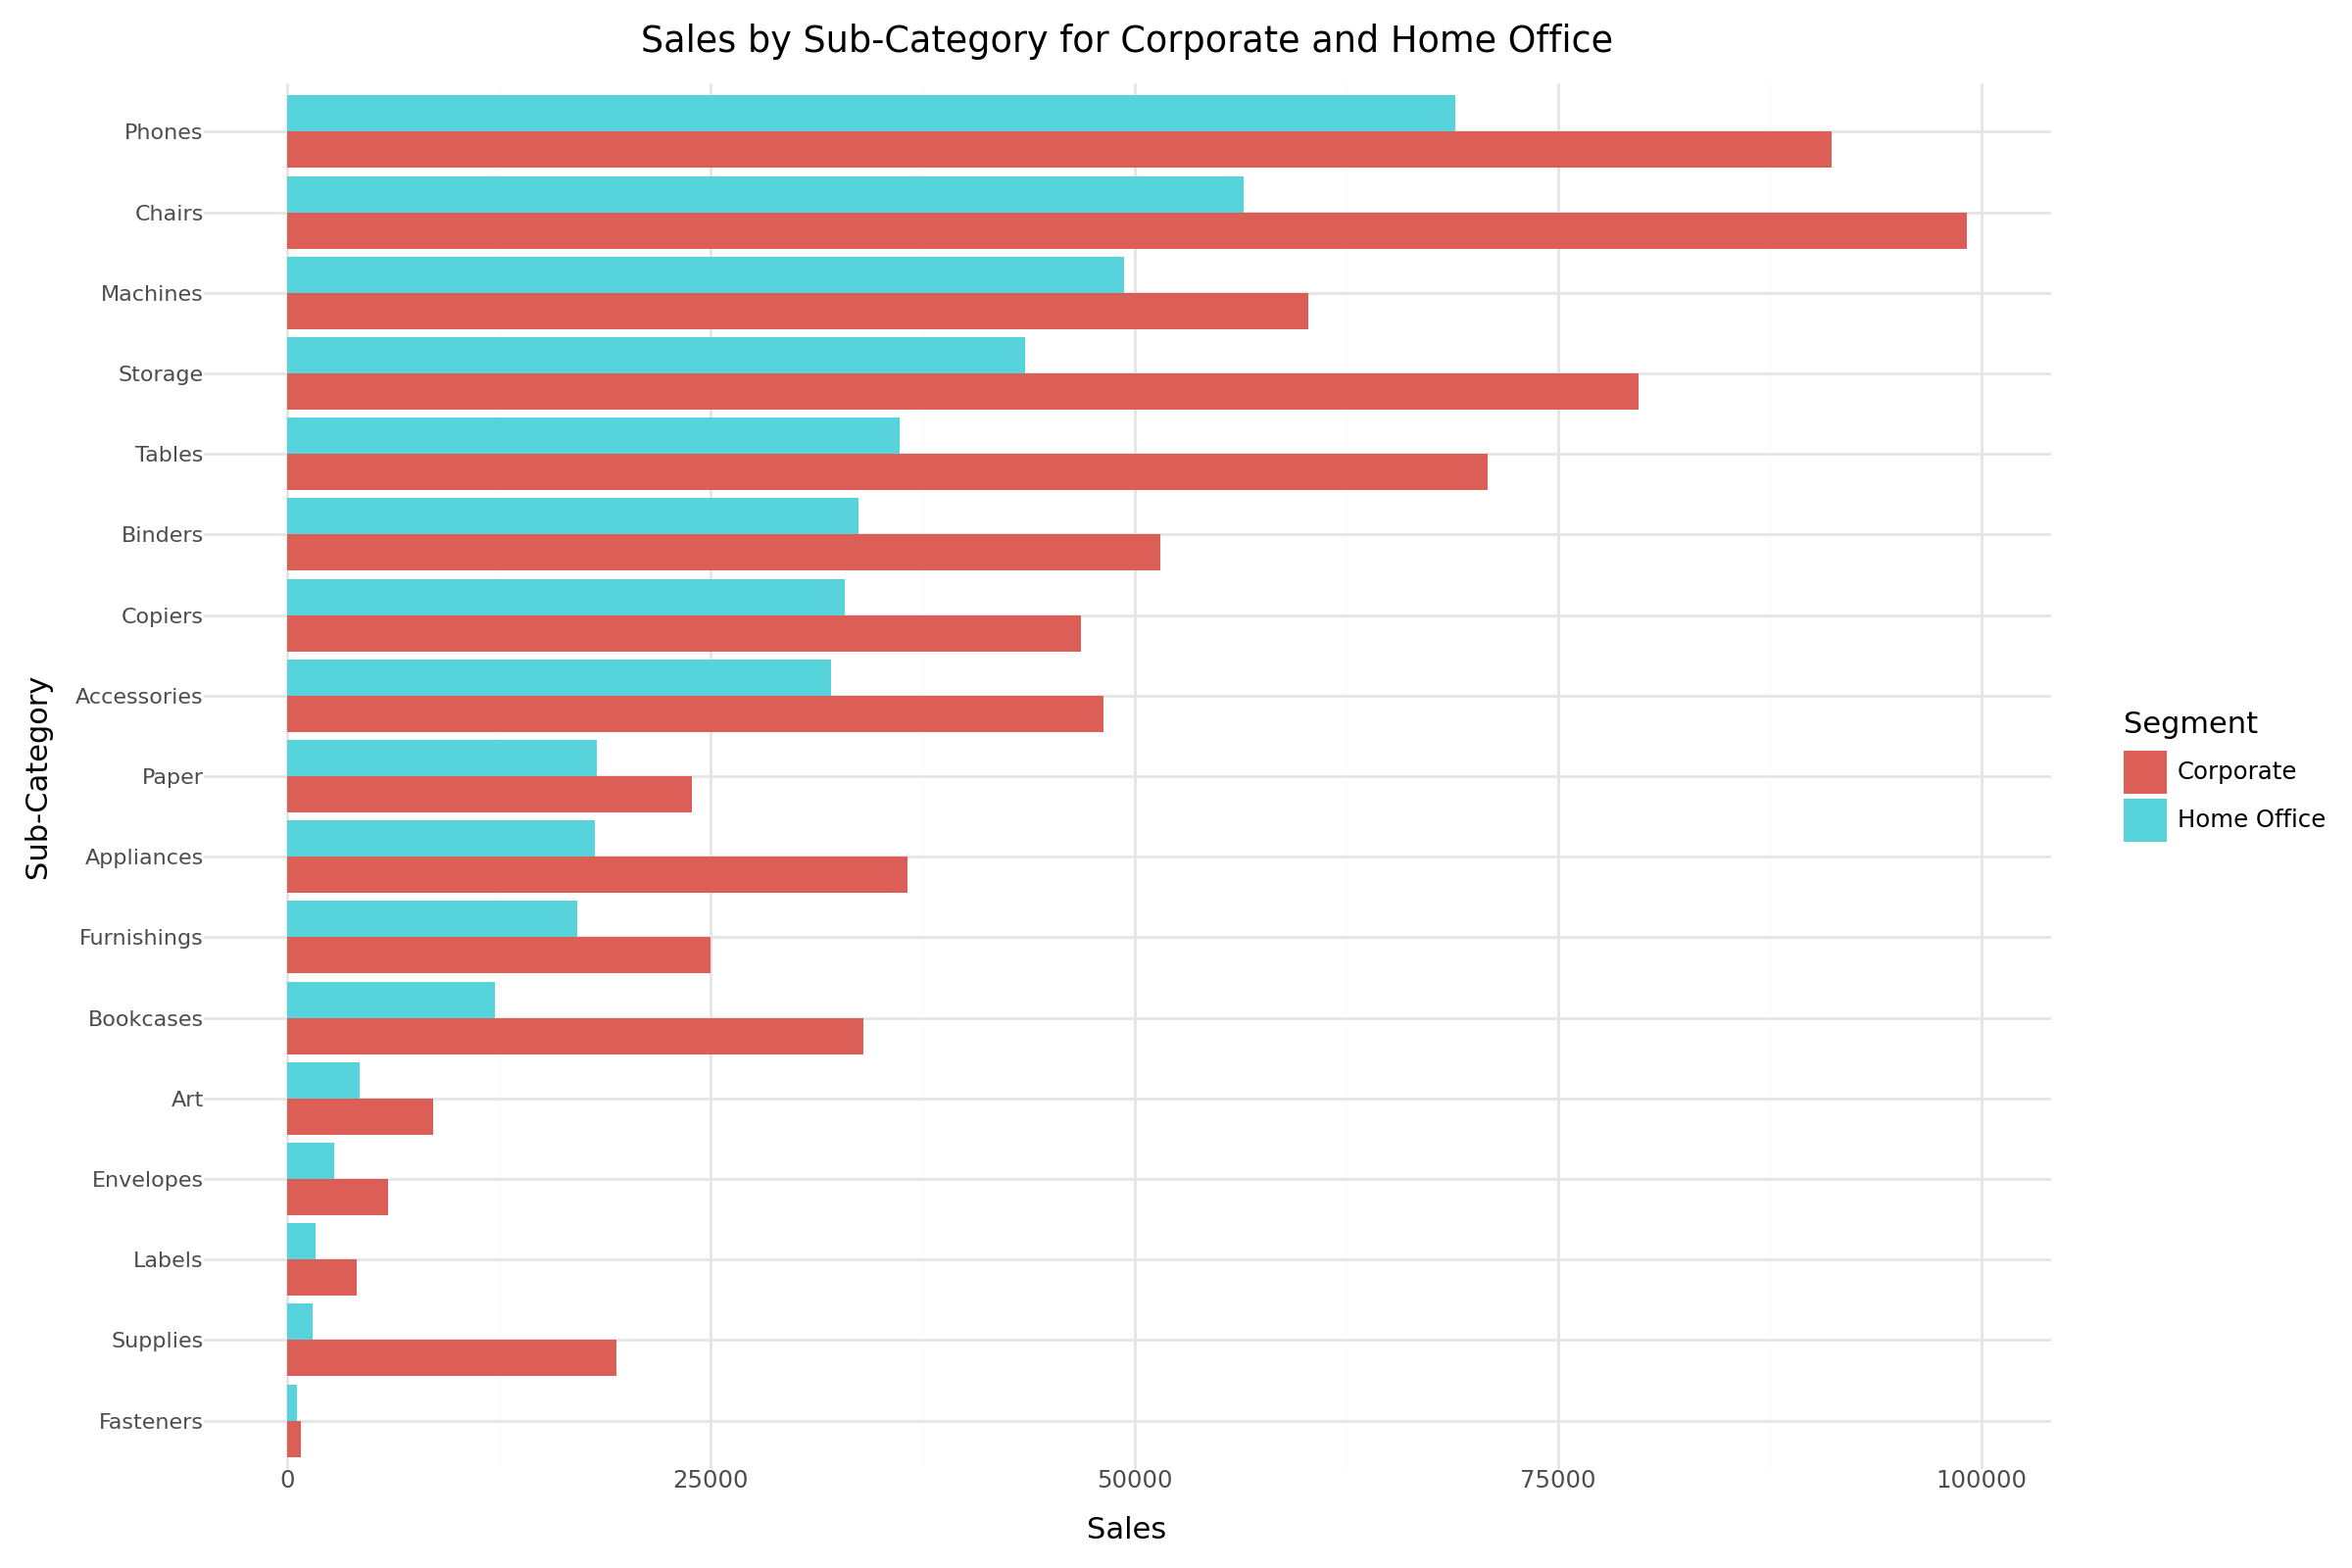

In [25]:
corporate_home_office = df[df['Segment'].isin(['Corporate', 'Home Office'])]

sales_by_subcategory = corporate_home_office.groupby(['Segment', 'Sub-Category'])['Sales'].sum().reset_index()

sales_by_subcategory = sales_by_subcategory.sort_values('Sales', ascending=True)

sales_by_subcategory['Sub-Category'] = pd.Categorical(sales_by_subcategory['Sub-Category'], 
                                        categories=sales_by_subcategory['Sub-Category'].unique(),
                                        ordered=True)

plot = (p9.ggplot(sales_by_subcategory, p9.aes(x='Sub-Category', y='Sales', fill='Segment'))
 + p9.geom_bar(stat='identity', position='dodge')
 + p9.coord_flip()
 + p9.labs(title='Sales by Sub-Category for Corporate and Home Office', 
           x='Sub-Category', 
           y='Sales')
 + p9.theme_minimal()
 + p9.theme(figure_size=(12, 8),
            axis_text_y=p9.element_text(size=8))
)

plot.show()



In [26]:
# The top 10 products are primarily office supplies. I had a hypothesis that, although regular customers contribute
# the most to overall sales, they buy a variety of products, where corporates and home offices purchase 
# almost exclusively office supplies in bulk. So it would be a reason why we see that list of top products.
# However, after analyzing the sales distribution of top products by segment, 
# we see that regular customers are responsible for most of the sales.

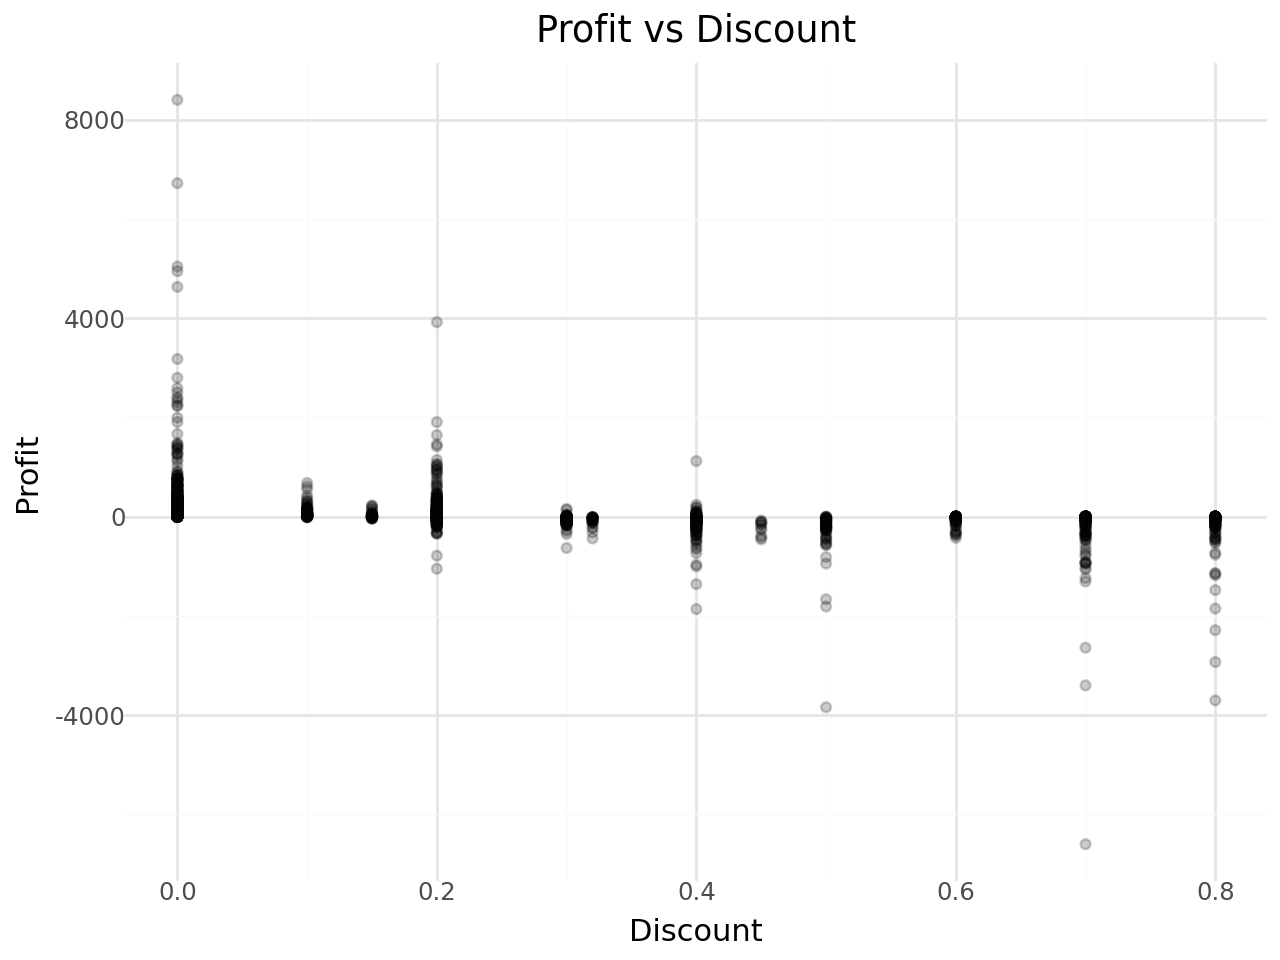

In [27]:
# Scatter plot for profit vs discount
(p9.ggplot(df, p9.aes(x='Discount', y='Profit'))
 + p9.geom_point(alpha=0.2)
 + p9.labs(title='Profit vs Discount', x='Discount', y='Profit')
 + p9.theme_minimal()
)


In [28]:
# Check if it is possible to have negative profit with 0 discount (e.g accountong for delivery cost, etc.)
df[(df['Discount'] == 0) & (df['Profit'] < 0)]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Standard,Postal


In [29]:
# Box plot would be better for this but we still can see that discount below 0.2 has positive profit on avg (it hard to 
# say definitevly if 0.2 has positive profit as well). But discounts above 0.2 mostly result in negative profit.


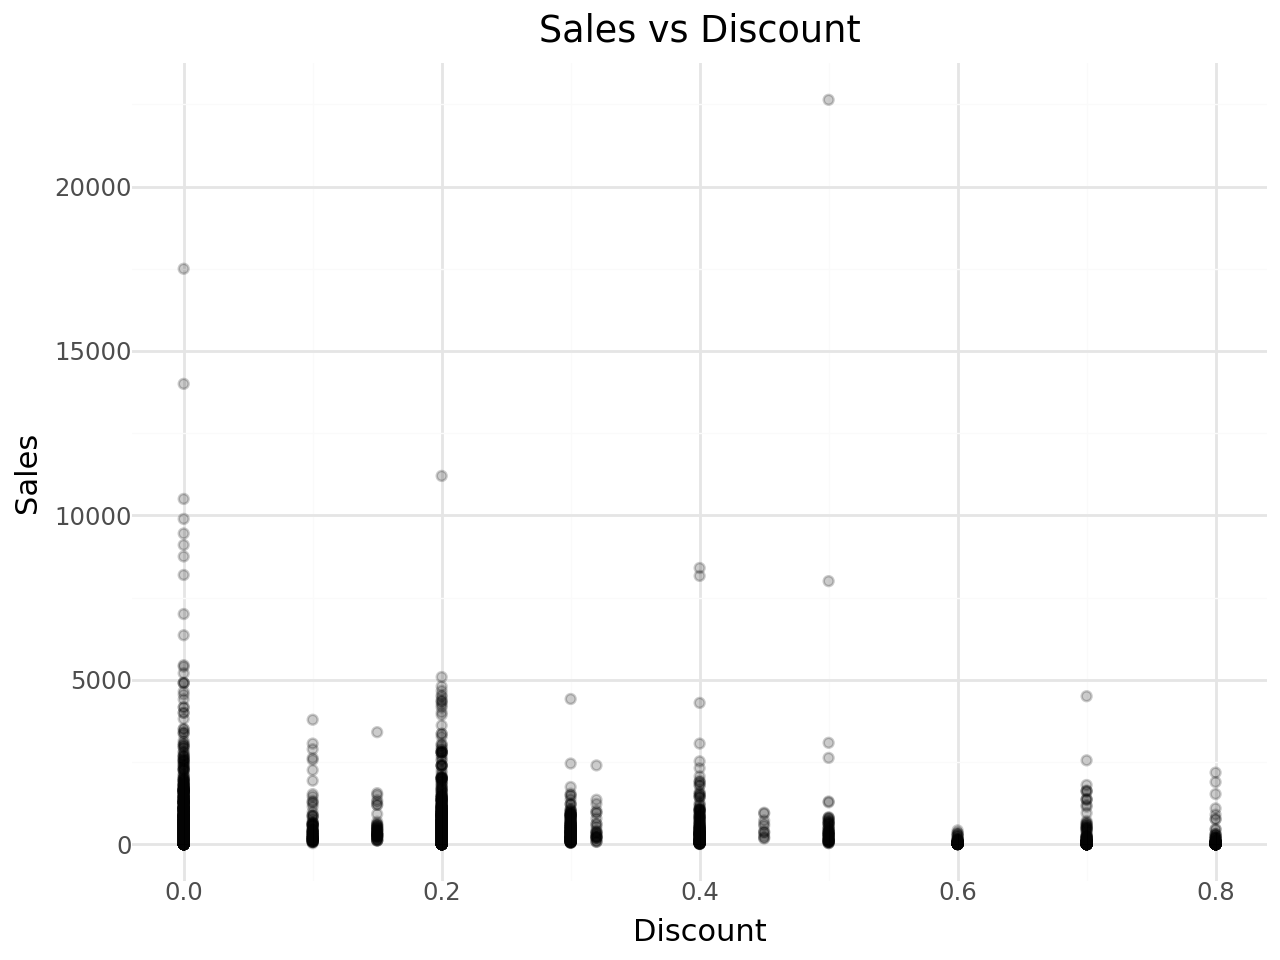

In [30]:
# Scatter plot for sales vs discount
(p9.ggplot(df, p9.aes(x='Discount', y='Sales'))
 + p9.geom_point(alpha=0.2)
 + p9.labs(title='Sales vs Discount', x='Discount', y='Sales')
 + p9.theme_minimal()
)

In [31]:
# Talking about ease of use, Plotly is more user-friendly and easier to use for beginners. And it is suitable for quick
# visualizations.
# Plotnine is more powerful and flexible, but it requires more knowledge of the underlying libraries. And I hope I won't 
# need to use anymore :)

